## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = study_results.merge(mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_Mouse_ID = combined_data.loc[(combined_data.duplicated(["Mouse ID","Timepoint"]) == True),"Mouse ID"].reset_index()
del duplicate_Mouse_ID["index"]
duplicate_Mouse_ID

,Mouse ID
0,g989
1,g989
2,g989
3,g989
4,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"] == ]


SyntaxError: invalid syntax (<ipython-input-4-44c40c5da0b2>, line 2)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.loc[(combined_data["Mouse ID"]!="g989")]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Step 1: Get counts for all the different Drug Regimens
Drug_Regimen = cleaned_data[["Drug Regimen","Tumor Volume (mm3)"]]

# Step 2: Create series for each statistic
Drug_Regimen_mean   = Drug_Regimen.groupby("Drug Regimen").mean().rename(columns={"Tumor Volume (mm3)" : "Mean"})
Drug_Regimen_median = Drug_Regimen.groupby("Drug Regimen").median().rename(columns={"Tumor Volume (mm3)" : "Median"})
Drug_Regimen_var    = Drug_Regimen.groupby("Drug Regimen").var().rename(columns={"Tumor Volume (mm3)" : "Variance"})
Drug_Regimen_std    = Drug_Regimen.groupby("Drug Regimen").std().rename(columns={"Tumor Volume (mm3)" : "Standard Deviation"})
Drug_Regimen_sem    = Drug_Regimen.groupby("Drug Regimen").sem().rename(columns={"Tumor Volume (mm3)" : "SEM"})

# Step 3: Merge the series together
Drug_Regimen_Table_One = Drug_Regimen_mean.join([Drug_Regimen_median,Drug_Regimen_var,Drug_Regimen_std,Drug_Regimen_sem])

#Step 4: Print the result as a table
Drug_Regimen_Table_One

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# Step 1: Get counts for all the different Drug Regimens
Drug_Regimen = cleaned_data[["Drug Regimen","Tumor Volume (mm3)"]]
# Step 2: Get the "mean", "median", "var", "std" and "sem" of the tumor volume for each regimen
Drug_Regimen_Table_Two = Drug_Regimen.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])
# Step 3: Rename the columns
Drug_Regimen_Table_Two = Drug_Regimen_Table.rename(columns={"mean" : "Mean", "median" : "Median" , "var" : "Variance", 
                                                        "std" : "Standard Deviation", "sem" : "SEM"
                                                 })
# Step 4: Print the result as a table
Drug_Regimen_Table_Two

NameError: name 'Drug_Regimen_Table' is not defined

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Mice over time'}, xlabel='Timepoint'>

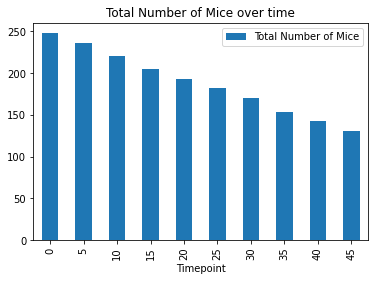

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Step 1: Get the total number of mice for each time period
mouse_numbers_over_time = cleaned_data[["Timepoint","Mouse ID"]].groupby("Timepoint").count().reset_index()
# Step 2: Rename the "Mouse ID" column
mouse_numbers_over_time = mouse_numbers_over_time.rename(columns={"Mouse ID" : "Total Number of Mice"})

# Step 3: Plot the data
mouse_numbers_over_time.plot(kind = "bar", x = "Timepoint", y = "Total Number of Mice", 
                            title = "Total Number of Mice over time")


<BarContainer object of 10 artists>

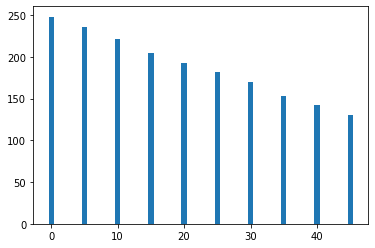

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar( mouse_numbers_over_time["Timepoint"], mouse_numbers_over_time["Total Number of Mice"] )


<AxesSubplot:ylabel='Sex'>

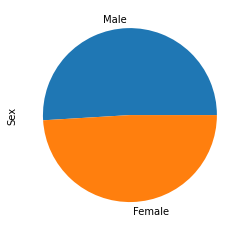

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_distributions = cleaned_data["Sex"].value_counts()
male_female_distributions.plot( kind = "pie")

([<matplotlib.patches.Wedge at 0x1fd1c480f40>,
 [Text(-0.03308201408261547, 1.0995024239828841, ''),
  Text(0.033082014082615095, -1.0995024239828841, '')])

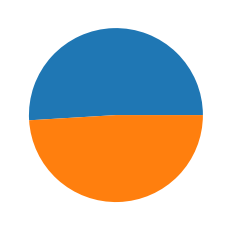

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_female_distributions)


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Step 1: Get the four of the treatment regimens
#four_treatments = cleaned_data.loc[(cleaned_data["Drug Regimen"].isin([ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]))]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby("Mouse ID").max("Timepoint").reset_index()
#max_timepoint
#max_timepoint = cleaned_data.groupby("Mouse ID").max("Timepoint").reset_index()
max_timepoint = max_timepoint[["Mouse ID", "Timepoint"]]
# max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume_data = cleaned_data.merge( max_timepoint, on = ["Mouse ID", "Timepoint"] )
final_tumor_volume_data.head(248)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [89]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments_list = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin" ]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Step 1: Locate the rows which contain mice on each drug 
four_treatments_subset = final_tumor_volume_data.loc[final_tumor_volume_data["Drug Regimen"].isin(four_treatments_list)]
# Step 2: Get the tumor volumes
four_treatments_subset = four_treatments_subset[["Drug Regimen","Tumor Volume (mm3)"]].reset_index()
del four_treatments_subset["index"]
# Step 3: Get the quartiles for each treatment
quartiles = four_treatments_subset.groupby("Drug Regimen").quantile([.25,.5,.75]).reset_index()
quartiles = quartiles.rename(columns={"level_1" : "Quartile"})

print(four_treatments_subset)

# Step 4: Get the IQR for each treatment
for treatment in four_treatments_list:
    
    lower_quartile = quartiles.loc[((quartiles["Drug Regimen"] == treatment) & (quartiles["Quartile"] == 0.25)), 
                           "Tumor Volume (mm3)"].values[0]
    
    upper_quartile = quartiles.loc[((quartiles["Drug Regimen"] == treatment) & (quartiles["Quartile"] == 0.75)), 
                           "Tumor Volume (mm3)"].values[0]
    
    inter_quartile_range = upper_quartile - lower_quartile

    lower_bound = lower_quartile - (1.5*iqr)
    
    upper_bound = upper_quartile + (1.5*iqr)
    
    lower_bound = lower_bound
    
    upper_bound = upper_bound

    


   Drug Regimen  Tumor Volume (mm3)
0      Ceftamin           45.000000
1      Ceftamin           45.000000
2      Ceftamin           45.000000
3      Ceftamin           45.000000
4     Infubinol           36.321346
..          ...                 ...
95     Ramicane           32.978522
96     Ramicane           33.562402
97    Capomulin           41.581521
98    Capomulin           31.023923
99     Ceftamin           61.433892

[100 rows x 2 columns]


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='[Drug Regimen]'>

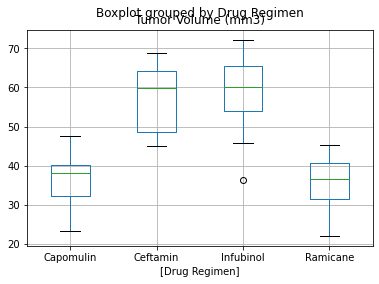

In [94]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_treatments_subset.boxplot(by="Drug Regimen")

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

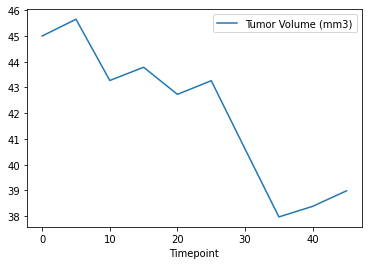

In [112]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_first_mouse = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin"),"Mouse ID"].head(1)[0]
Capomulin_first_mouse
Capomulin_first_mouse_data = cleaned_data.loc[(cleaned_data["Mouse ID"] == Capomulin_first_mouse)]

Capomulin_first_mouse_data.plot(x="Timepoint",y="Tumor Volume (mm3)")


<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

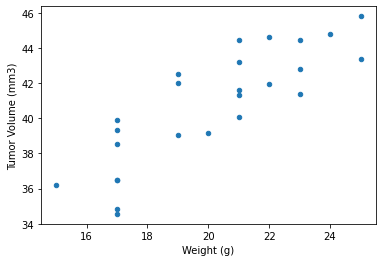

In [120]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_data = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin")]
#Capomulin_data
Average_tumor_volume = Capomulin_data[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].groupby("Mouse ID").mean().round(2).reset_index()
#Average_tumor_volume
Average_tumor_volume.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)")

## Correlation and Regression

Text(20, 40, 'y = 0.95x + 21.56')

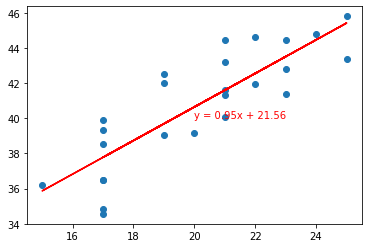

In [141]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = Average_tumor_volume["Weight (g)"]
y_values = Average_tumor_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(20,40),fontsize=10,color="red")